# Exploratory Data Analysis

In [2]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()
work_dir = os.getenv('WORK_DIR')

sys.path.append(work_dir)

print('Workdir: ', work_dir)

Workdir:  /Users/carol/Documents/workshop01


In [3]:
from src.db_connection import build_engine
from src.model import Candidates
from sqlalchemy.orm import sessionmaker, declarative_base, aliased
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
engine = build_engine()

Successfully connected to the database workshop1!


In [5]:
Session = sessionmaker(bind=engine)
session = Session()

In [6]:
base = declarative_base()
table = aliased(Candidates)

In [7]:
query = session.query(table).statement
df = pd.read_sql(query, engine)

In [9]:
df.shape

(50000, 11)

In [10]:
df.columns

Index(['ID', 'First_Name', 'Last_Name', 'Email', 'Application_Date', 'Country',
       'YOE', 'Seniority', 'Technology', 'Code_Challenge_Score',
       'Technical_Interview_Score'],
      dtype='object')

In [39]:
df.head()

,First_Name,Last_Name,Email,Application_Date,Country,YOE,Seniority,Technology,Code_Challenge_Score,Technical_Interview_Score,Hired
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3,0
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10,0
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9,1
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1,0
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7,1


In [10]:
df['Hired'] = ((df['Code_Challenge_Score'] >=7) & (df['Technical_Interview_Score'] >=7)).astype(int)

In [37]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape[0])

number of duplicate rows:  0


## Data missing

In [55]:
missing_data = df.isna().sum()
missing_data

ID                           0
First_Name                   0
Last_Name                    0
Email                        0
Application_Date             0
Country                      0
YOE                          0
Seniority                    0
Technology                   0
Code_Challenge_Score         0
Technical_Interview_Score    0
dtype: int64

## Data type

In [50]:
# categorical veriables
categorical_variables=[i for i in df.columns if df[i].dtypes=='O']
print(f'\nDataset having {len(categorical_variables)} categorical variables')
print('--'*39)
print(categorical_variables)


# numerical varibles
numerical_variables=[i for i in df.columns if df[i].dtypes!='O']
print(f'\nDataset having {len(numerical_variables)} numerical variables.')
print('--'*39)
print(numerical_variables)


Dataset having 7 categorical variables
------------------------------------------------------------------------------
['First_Name', 'Last_Name', 'Email', 'Application_Date', 'Country', 'Seniority', 'Technology']

Dataset having 4 numerical variables.
------------------------------------------------------------------------------
['ID', 'YOE', 'Code_Challenge_Score', 'Technical_Interview_Score']


## Data Distribution

# Outliers

In [28]:
df = df.drop(columns=['ID'])

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YOE,50000.0,15.28698,8.830652,0.0,8.0,15.0,23.0,30.0
Code_Challenge_Score,50000.0,4.99640,3.166896,0.0,2.0,5.0,8.0,10.0
Technical_Interview_Score,50000.0,5.00388,3.165082,0.0,2.0,5.0,8.0,10.0


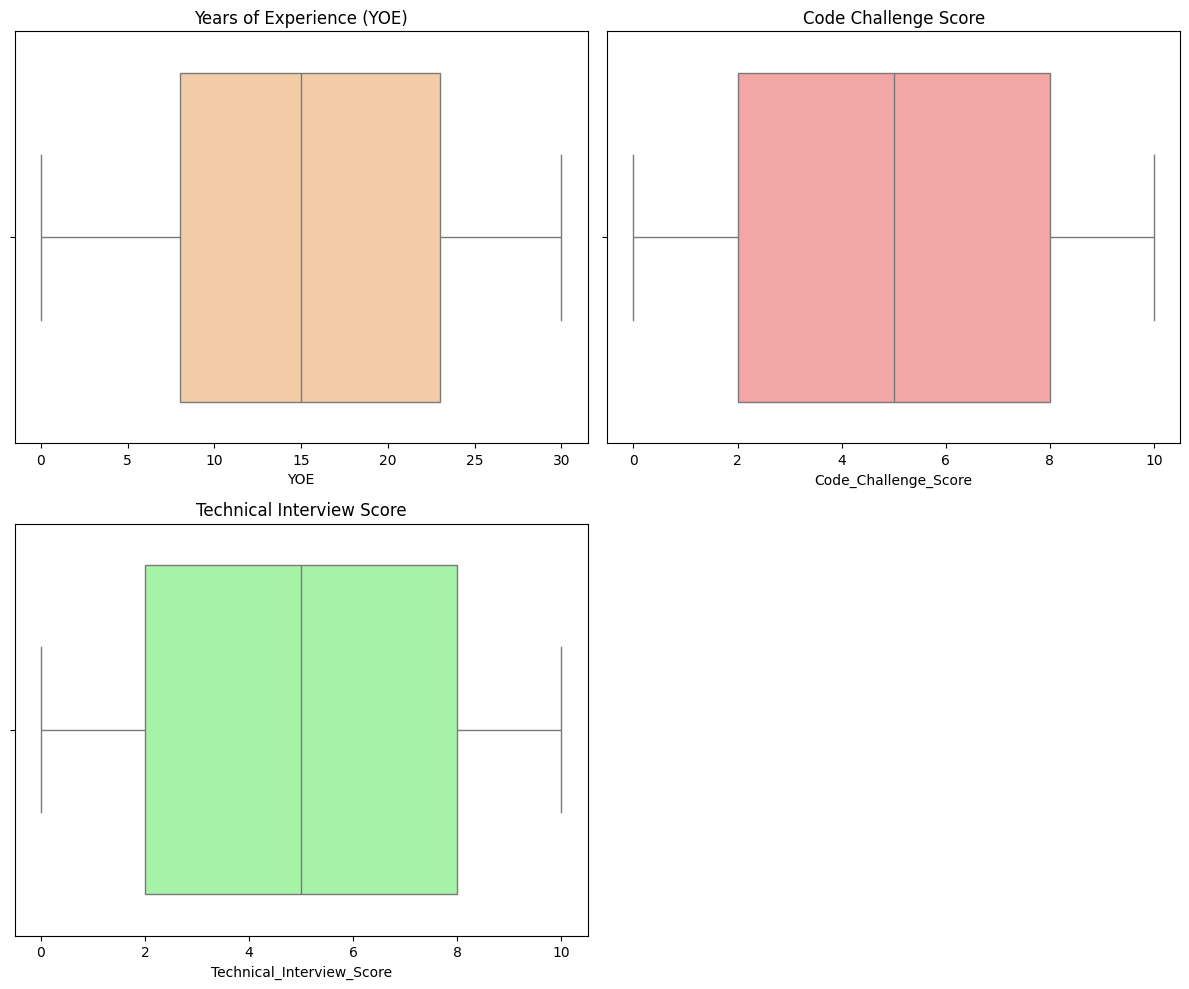

In [33]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))


sns.boxplot(ax=axes[0, 0], x=df["YOE"], color='#FFCC99')
axes[0, 0].set_title('Years of Experience (YOE)')

sns.boxplot(ax=axes[0, 1], x=df["Code_Challenge_Score"], color='#FF9999')
axes[0, 1].set_title('Code Challenge Score')

sns.boxplot(ax=axes[1, 0], x=df["Technical_Interview_Score"], color='#99FF99')
axes[1, 0].set_title('Technical Interview Score')

fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

## Data Correlation

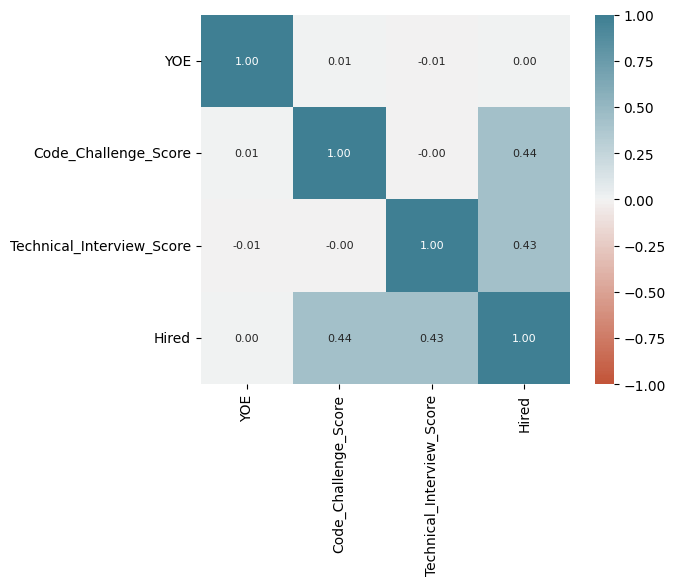

In [31]:
correlation= df.select_dtypes(include=[float, int]).corr()

ax = sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt='.2f',
    annot_kws={"size": 8}
)

# Data Patterns

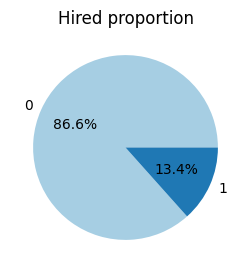

In [49]:
hired_count = df['Hired'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(hired_count, labels=hired_count.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Hired proportion')
plt.show()

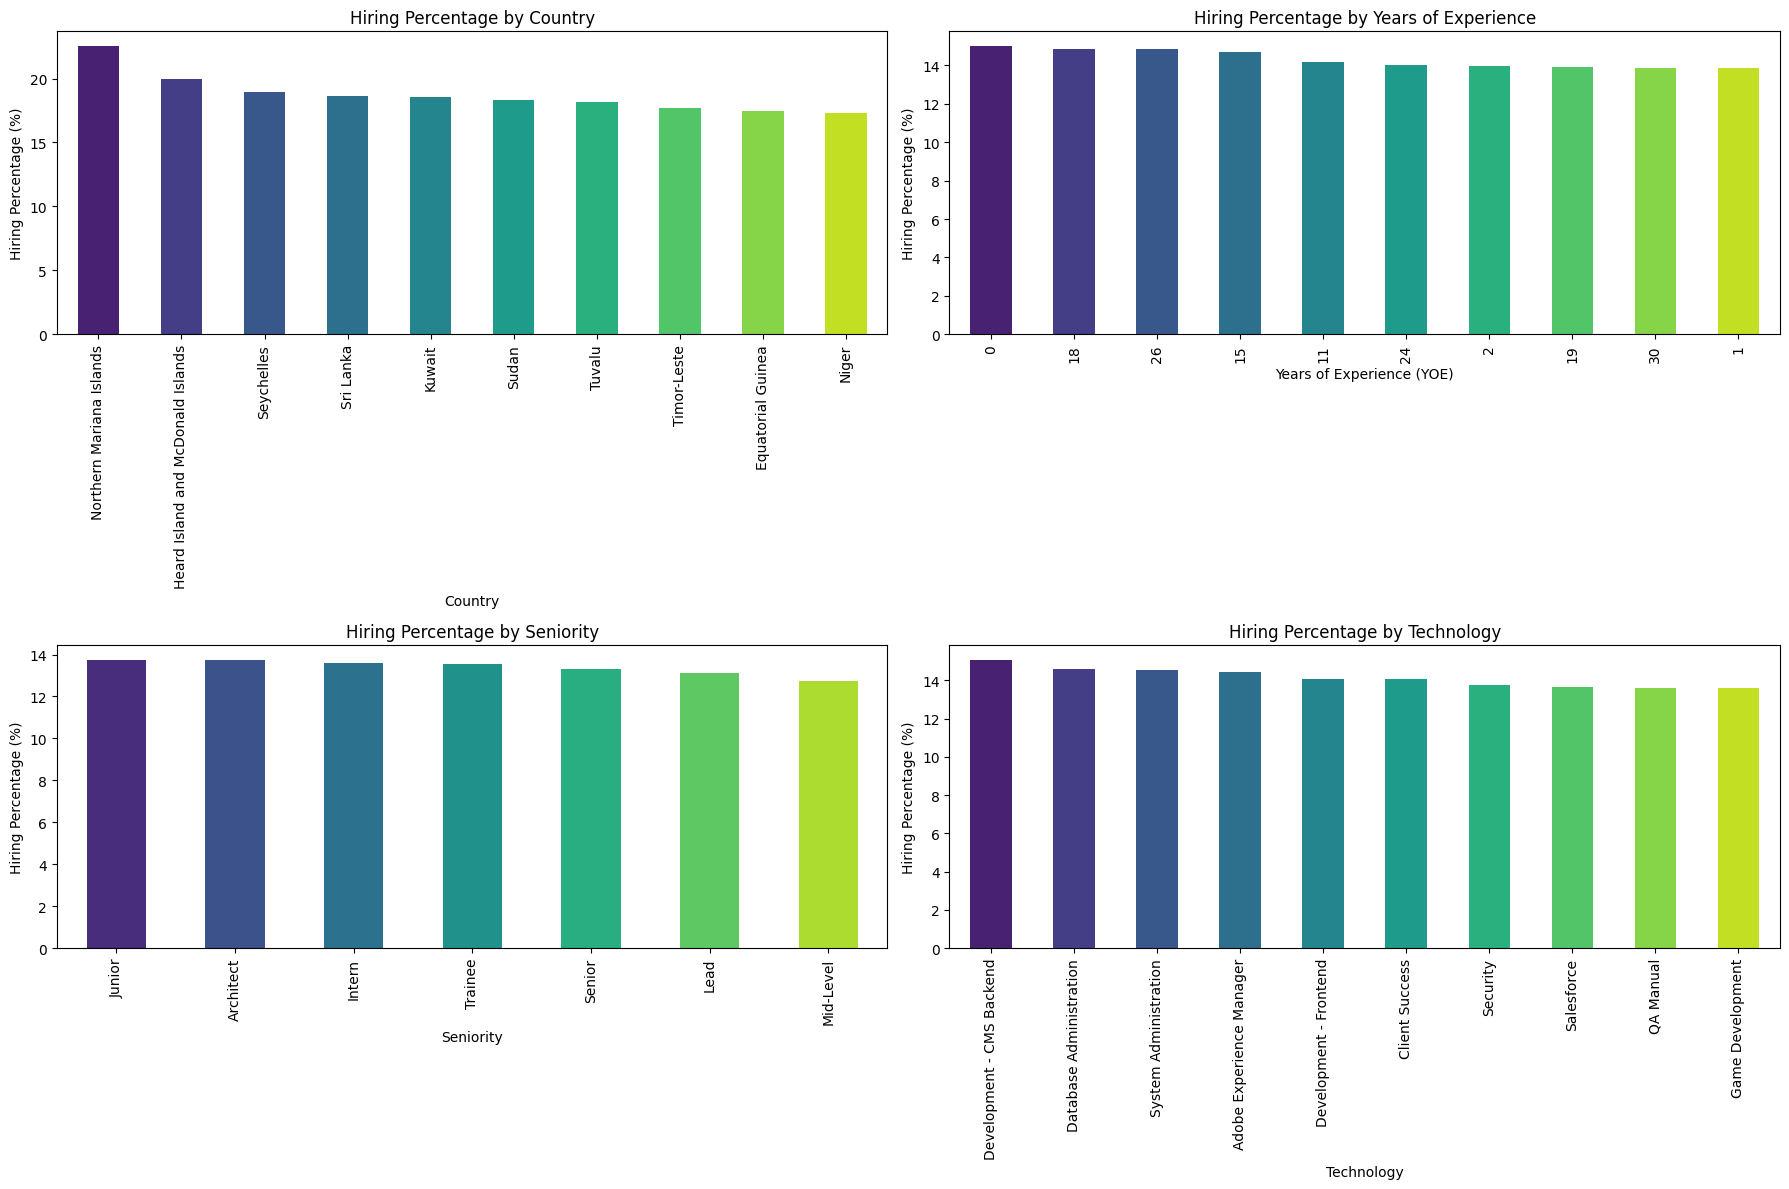

In [90]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

temp = df.groupby('Country').Hired.mean().sort_values(ascending=False) * 100
temp = temp[0:10]
palette = sns.color_palette("viridis", len(temp))
temp.plot.bar(color=palette, ax=axs[0, 0])
axs[0, 0].set_title('Hiring Percentage by Country')
axs[0, 0].set_xlabel('Country')
axs[0, 0].set_ylabel('Hiring Percentage (%)')


temp = df.groupby('YOE').Hired.mean().sort_values(ascending=False) * 100
temp = temp[0:10]
palette = sns.color_palette("viridis", len(temp))
temp.plot.bar(color=palette, ax=axs[0, 1])
axs[0, 1].set_title('Hiring Percentage by Years of Experience')
axs[0, 1].set_xlabel('Years of Experience (YOE)')
axs[0, 1].set_ylabel('Hiring Percentage (%)')


temp = df.groupby('Seniority').Hired.mean().sort_values(ascending=False) * 100
temp = temp[0:10]
palette = sns.color_palette("viridis", len(temp))
temp.plot.bar(color=palette, ax=axs[1, 0])
axs[1, 0].set_title('Hiring Percentage by Seniority')
axs[1, 0].set_xlabel('Seniority')
axs[1, 0].set_ylabel('Hiring Percentage (%)')


temp = df.groupby('Technology').Hired.mean().sort_values(ascending=False) * 100
temp = temp[0:10]
palette = sns.color_palette("viridis", len(temp))
temp.plot.bar(color=palette, ax=axs[1, 1])
axs[1, 1].set_title('Hiring Percentage by Technology')
axs[1, 1].set_xlabel('Technology')
axs[1, 1].set_ylabel('Hiring Percentage (%)')


plt.tight_layout()
plt.show()

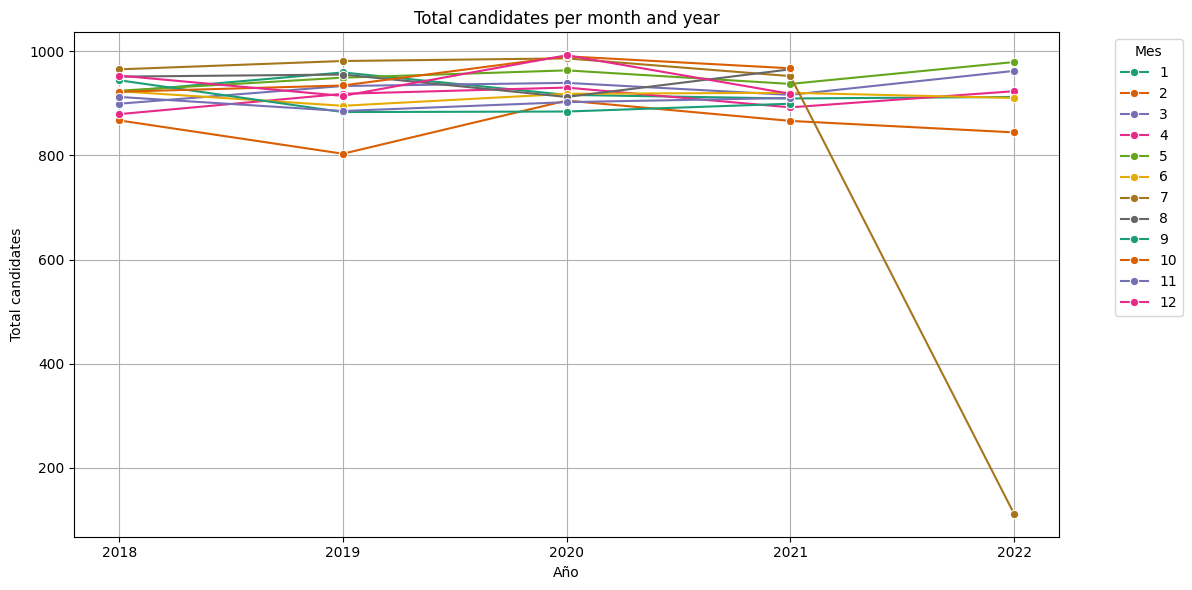

In [44]:
df_date = df.copy()
df_date['Application_Date'] = pd.to_datetime(df_date['Application_Date'])

df_date['year'] = df_date['Application_Date'].dt.year
df_date['month'] = df_date['Application_Date'].dt.month

df_date = df_date[['year', 'month','Hired']]

df_total_candidates = df_date.groupby(['year', 'month']).size().reset_index(name='total_candidates')

df_total_candidates['month'] = df_total_candidates['month'].astype('category')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_total_candidates, x='year', y='total_candidates', hue='month', marker='o', palette='Dark2')

plt.title('Total candidates per month and year')
plt.xlabel('Año')
plt.ylabel('Total candidates')
plt.legend(title='Mes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.tight_layout()

plt.show()

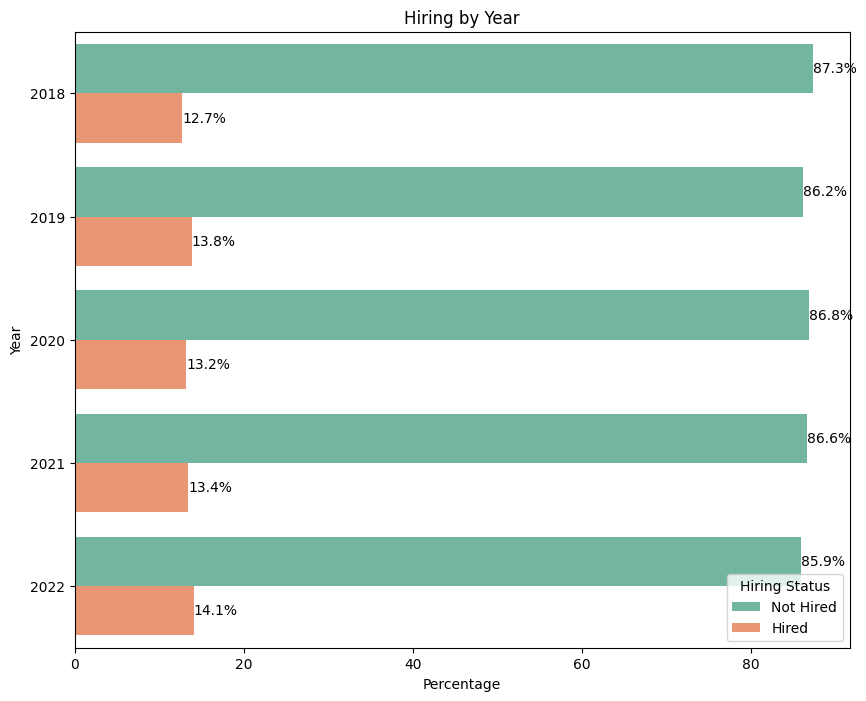

In [45]:
df_date['count'] = 1

df_summary = df_date.groupby(['year', 'Hired']).agg({'count': 'sum'}).reset_index()
total_per_year = df_summary.groupby('year')['count'].transform('sum')

df_summary['percentage'] = (df_summary['count'] / total_per_year) * 100

df_summary['Hired'] = df_summary['Hired'].replace({1: 'Hired', 0: 'Not Hired'})

plt.figure(figsize=(10, 8))

ax = sns.barplot(data=df_summary, x='percentage', y='year', hue='Hired', orient='h', dodge=True, palette='Set2')

for p in ax.patches:
    height = p.get_height()
    if height > 0.1:
        width = p.get_width()
        x = width
        y = p.get_y() + p.get_height() / 2
        ax.text(x, y, f'{width:.1f}%', va='center', ha='left', fontsize=10, color='black')
        
plt.xlabel('Percentage')
plt.ylabel('Year')
plt.title('Hiring by Year')
plt.legend(title='Hiring Status')
plt.show()

In [42]:
df_attempts = df.copy()
df_attempts ['Attempt'] = df_attempts.groupby('Email').cumcount() + 1

attempt_counts = df_attempts['Attempt'].value_counts()
attempt_counts

Attempt
1    49833
2      165
3        2
Name: count, dtype: int64

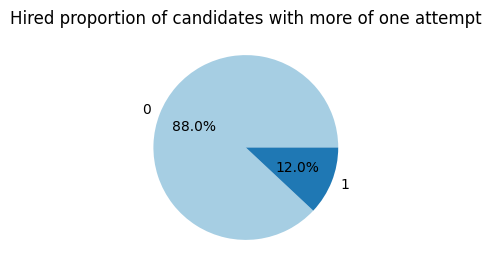

In [66]:
more_than_one_attempt = df_attempts[df_attempts['Attempt']>=2]
hired_proportion = more_than_one_attempt['Hired'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(hired_proportion, labels=hired_proportion.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Hired proportion of candidates with more of one attempt')
plt.show()

C:\Users\carol\AppData\Local\Temp\ipykernel_11764\3625773323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Seniority', y='YOE', data=df, palette='Set3')


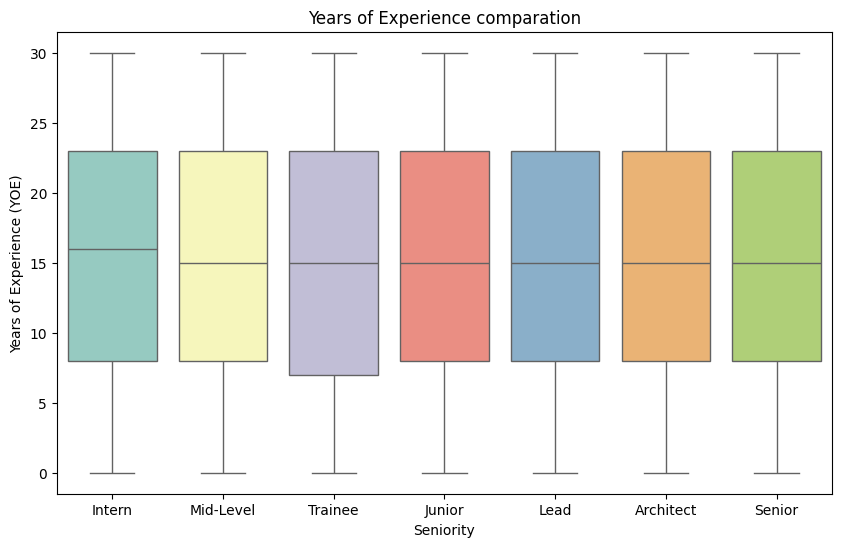

In [55]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Seniority', y='YOE', data=df, palette='Set3')
plt.title('Years of Experience comparation')
plt.xlabel('Seniority')
plt.ylabel('Years of Experience (YOE)')
plt.show()

## Data Quality